In [1]:
!pip install -qq transformers[sentencepiece] datasets sentence-transformers umap-learn pytorch_lightning torchmetrics tableprint

     |████████████████████████████████| 3.1 MB 4.6 MB/s 
     |████████████████████████████████| 298 kB 47.7 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 523 kB 38.8 MB/s 
     |████████████████████████████████| 329 kB 45.9 MB/s 
     |████████████████████████████████| 132 kB 38.7 MB/s 
     |████████████████████████████████| 243 kB 47.1 MB/s 
     |████████████████████████████████| 1.1 MB 33.6 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 1.2 MB 27.5 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
     |████████████████████████████████| 895 kB 29.0 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 829 kB 45.5 MB/s 
     |████████████████████████████████| 192 kB 45.9 MB/s 
     |███████████████

# mBERT

In [ ]:
from transformers import pipeline 
unmasker = pipeline('fill-mask', model='bert-base-multilingual-uncased') 

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/641M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

In [ ]:
sentences = [ 
"Transformers changed the [MASK] language processing", 
"Transformerlar [MASK] dil işlemeyi değiştirdiler", 
"ترنسفرمرها پردازش زبان [MASK] را تغییر دادند" 
] 
for sentence in sentences: 
    print(sentence) 
    print(unmasker(sentence)[0]["sequence"]) 
    print("="*50)

Transformers changed the [MASK] language processing
transformers changed the english language processing
Transformerlar [MASK] dil işlemeyi değiştirdiler
transformerlar bu dil islemeyi degistirdiler
ترنسفرمرها پردازش زبان [MASK] را تغییر دادند
ترنسفرمرها پردازش زبانی را تغییر دادند


# XLM

In [ ]:
unmasker = pipeline('fill-mask', model='xlm-roberta-base')

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [ ]:
sentences = [ 
"Transformers changed the <mask> language processing", 
"Transformerlar <mask> dil işlemeyi değiştirdiler", 
"ترنسفرمرها پردازش زبان <mask> را تغییر دادند" 
]

In [ ]:
for sentence in sentences: 
  print(sentence) 
  print(unmasker(sentence)[0]["sequence"]) 
  print("="*50) 

Transformers changed the <mask> language processing
Transformers changed the human language processing
Transformerlar <mask> dil işlemeyi değiştirdiler
Transformerlar, dil işlemeyi değiştirdiler
ترنسفرمرها پردازش زبان <mask> را تغییر دادند
ترنسفرمرها پردازش زبانی را تغییر دادند


The model didn't do well because this wasn't a cross-lingual task (input and output were in the same language).

Below, it performs much better.

In [ ]:
print(unmasker("Transformers changed the natural language processing. </s> Transformerlar <mask> dil işlemeyi değiştirdiler.")[0]["sequence"]) 

Transformers changed the natural language processing. Transformerlar doğal dil işlemeyi değiştirdiler.


In [ ]:
print(unmasker("Earth is a great place to live in. </s> زمین جای خوبی برای <mask> کردن است.")[0]["sequence"]) 

Earth is a great place to live in. زمین جای خوبی برای زندگی کردن است.


# Cross-lingual text similarity

## XLM-R

In [ ]:
from sentence_transformers import SentenceTransformer, util 
model = SentenceTransformer("stsb-xlm-r-multilingual") 

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/709 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
azeri_sentences = ['Pişik çöldə oturur', 
              'Bir adam gitara çalır', 
              'Mən makaron sevirəm', 
              'Yeni film möhtəşəmdir', 
              'Pişik bağda oynayır', 
              'Bir qadın televizora baxır', 
              'Yeni film çox möhtəşəmdir', 
              'Pizzanı sevirsən?'] 

english_sentences = ['The cat sits outside', 
             'A man is playing guitar', 
             'I love pasta', 
             'The new movie is awesome',
             'The cat plays in the garden', 
             'A woman watches TV', 
             'The new movie is so great', 
             'Do you like pizza?'] 

In [ ]:
azeri_representation = model.encode(azeri_sentences) 
english_representation = model.encode(english_sentences) 

In [ ]:
results = [] 

for azeri_sentence, query in zip(azeri_sentences, azeri_representation): 
    id_, score = util.semantic_search( 
              query,english_representation)[0][0].values() 
              
    results.append({ 
      "azeri": azeri_sentence, 
      "english": english_sentences[id_], 
      "score": round(score, 4) 
    }) 

In [ ]:
import pandas as pd 
pd.DataFrame(results) 

,azeri,english,score
0,Pişik çöldə oturur,The cat sits outside,0.5969
1,Bir adam gitara çalır,A man is playing guitar,0.9939
2,Mən makaron sevirəm,I love pasta,0.6879
3,Yeni film möhtəşəmdir,The new movie is awesome,0.9818
4,Pişik bağda oynayır,The cat plays in the garden,0.2900
5,Bir qadın televizora baxır,A woman watches TV,0.9946
6,Yeni film çox möhtəşəmdir,The new movie is awesome,0.9818
7,Pizzanı sevirsən?,Do you like pizza?,0.9894


Fifth example (#4) is incorrect. Score should have been higher. 

## LaBSE

In [ ]:
model = SentenceTransformer("LaBSE")

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
azeri_representation = model.encode(azeri_sentences) 
english_representation = model.encode(english_sentences) 

In [ ]:
results = [] 

for azeri_sentence, query in zip(azeri_sentences, azeri_representation): 
    id_, score = util.semantic_search( 
              query,english_representation)[0][0].values() 
    
    results.append({ 
      "azeri": azeri_sentence, 
      "english": english_sentences[id_], 
      "score": round(score, 4) 
    }) 

In [ ]:
import pandas as pd 
pd.DataFrame(results) 

,azeri,english,score
0,Pişik çöldə oturur,The cat sits outside,0.8686
1,Bir adam gitara çalır,A man is playing guitar,0.9143
2,Mən makaron sevirəm,I love pasta,0.8888
3,Yeni film möhtəşəmdir,The new movie is awesome,0.9396
4,Pişik bağda oynayır,The cat plays in the garden,0.8957
5,Bir qadın televizora baxır,A woman watches TV,0.9359
6,Yeni film çox möhtəşəmdir,The new movie is so great,0.9258
7,Pizzanı sevirsən?,Do you like pizza?,0.9366


Results are better than what we obtained for XLM-R.

# Visualizing cross-lingual textual similarity

In [2]:
from datasets import load_dataset
import pandas as pd
data=load_dataset("xtreme","tatoeba.rus", split="validation")
pd.DataFrame(data)[["source_sentence","target_sentence"]]

Downloading:   0%|          | 0.00/9.04k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/tatoeba.rus/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17. Subsequent calls will reuse this data.


,source_sentence,target_sentence
0,"Я знаю много людей, у которых нет прав.\n",I know a lot of people who don't have driver's...
1,"У меня много знакомых, которые не умеют играть...",I know a lot of people who don't know how to p...
2,Мой начальник отпустил меня сегодня пораньше.\n,My boss let me leave early today.\n
3,Я загорел на пляже.\n,I tanned myself on the beach.\n
4,Вы сегодня проверяли почту?\n,Have you checked your email today?\n
...,...,...
995,Что сказал врач?\n,What did the doctor say?\n
996,"Я рад, что ты сегодня здесь.\n",I'm glad you're here today.\n
997,"Фермеры пригнали в деревню пять волов, девять ...",The farmers had brought five oxen and nine cow...
998,Жужжание пчёл заставляет меня немного нервнича...,The buzzing of the bees makes me a little nerv...


In [3]:
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer("stsb-xlm-r-multilingual") 

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/709 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
K=30
emb=model.encode(data["source_sentence"][:K]  + data["target_sentence"][:K])
len(emb), len(emb[0])

(60, 768)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


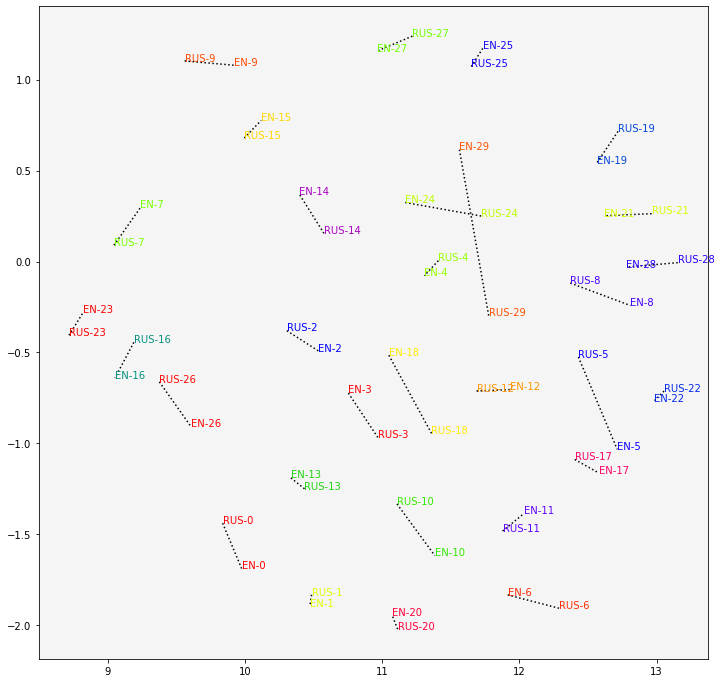

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import pylab

X= umap.UMAP(n_components=2, random_state=42).fit_transform(emb)
idx= np.arange(len(emb))

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('whitesmoke')

cm = pylab.get_cmap("prism")
colors = list(cm(1.0*i/K) for i in range(K))

for i in idx:
    if i<K:
        ax.annotate("RUS-"+str(i), (X[i,0], X[i,1]), c=colors[i])
        ax.plot((X[i,0], X[i+K,0]), (X[i,1], X[i+K,1]), "k:" )
    else:
        ax.annotate("EN-"+str(i%K), (X[i,0], X[i,1]), c=colors[i%K])
      

In [6]:
source_emb=model.encode(data["source_sentence"])
target_emb=model.encode(data["target_sentence"])

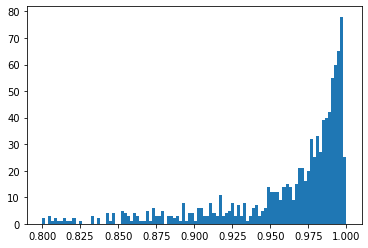

In [7]:
from scipy import spatial
from matplotlib import pyplot
sims=[ 1 - spatial.distance.cosine(s,t) for s,t in zip(source_emb, target_emb)]
pyplot.hist(sims, bins=100, range=(0.8,1))
pyplot.show()

In [8]:
np.mean(sims), np.std(sims)

(0.946454012915492, 0.08259263116585604)

# Cross-lingual classification

This task assumes we have 
- a multi-lingual model
- a labeled dataset for classification (e.g. English)
- an unlabeled dataset (e.g. Khmer)

Our task is to label the unlabeled dataset.

In [ ]:
from datasets import load_dataset 
imdb = load_dataset("imdb")

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
imdb = imdb.shuffle()

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a/cache-e3043e6109a06e2f.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a/cache-a12d090c27458a3e.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a/cache-bba9532dc0509f83.arrow


In [ ]:
imdb_x = [x for x in imdb['train'][:1000]['text']] 
labels = [x for x in imdb['train'][:1000]['label']] 
import pandas as pd 
pd.DataFrame(imdb_x, 
             columns=["text"]).to_excel( 
                                 "imdb.xlsx", 
                                  index=None) 

In [ ]:
pd.read_excel("khmer.xlsx") 

,text,translate
0,"While the original 1932 version, with Preston ...",ខណៈដែលកំណែដើម 1932 ដែលមានប្រេសតុនជំរុញគឺល្អមិន...
1,Ironically the most talked-about American film...,អ្វីដែលគួរឱ្យហួសចិត្តនេះ - និយាយអំពីខ្សែភាពយន្...
2,"Bingo is the game, bullshit is the name. Rarel...","ប៊ីងហ្គោគឺជាហ្គេម, Bullshit គឺជាឈ្មោះ។ កម្រមាន..."
3,There are so many reasons as to why I rate the...,មានហេតុផលជាច្រើនដែលថាហេតុអ្វីបានជាខ្ញុំវាយតម្ល...
4,I thought watching employment videos on corpor...,ខ្ញុំគិតថាមើលវីដេអូការងារនៅលើការអនុលោមរបស់ក្រុ...
...,...,...
995,I saw the film for the first time at BBC on Ju...,ខ្ញុំបានឃើញខ្សែភាពយន្តនេះជាលើកដំបូងនៅឯ BBC នៅថ...
996,This film was pretty good. I am not too big a ...,ខ្សែភាពយន្តនេះល្អណាស់។ ខ្ញុំមិនមានអ្នកគាំទ្រច្...
997,Sudden Impact is the 4th of the Dirty Harry fi...,ផលប៉ះពាល់ភ្លាមៗគឺជាខ្សែភាពយន្តកខ្វក់និងខ្សែភាព...
998,"Three years ago, Rachel(Therese Fretwell) was ...",កាលពី 3 ឆ្នាំមុនលោកស្រី Rachel (Therese Fretwe...


In [ ]:
imdb_khmer = list(pd.read_excel("khmer.xlsx").translate) 

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y, khmer_train, khmer_test = train_test_split(imdb_x, labels, imdb_khmer, test_size = 0.2, random_state = 1) 

In [ ]:
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer("stsb-xlm-r-multilingual") 

In [ ]:
encoded_train = model.encode(train_x, convert_to_tensor=True) 
encoded_test = model.encode(test_x, convert_to_tensor=True) 
encoded_khmer_test = model.encode(khmer_test, convert_to_tensor=True) 

In [ ]:
import torch
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)

In [ ]:
encoded_train = encoded_train.type(torch.FloatTensor)
train_y = train_y.type(torch.FloatTensor).reshape(-1,1)


encoded_test = encoded_test.type(torch.FloatTensor)
test_y = test_y.type(torch.FloatTensor).reshape(-1,1)

encoded_khmer_test = encoded_khmer_test.type(torch.FloatTensor)
# y_train_A = y_train_A.type(torch.LongTensor)

In [ ]:

import time
import datetime
import torch.nn as nn


import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint

import tableprint as tp
import torchmetrics



In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
       
        self.model = nn.Sequential(
            nn.Linear(768, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        
        output = self.model(input)
        return output

In [ ]:
mymodel = Model()

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size=32

train_dataset = TensorDataset(encoded_train, train_y)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size = batch_size)

val_dataset = TensorDataset(encoded_test, test_y)
val_sampler = SequentialSampler(val_dataset)
val_loader = DataLoader(val_dataset, sampler=val_sampler, batch_size = batch_size)

In [ ]:
test_dataset = TensorDataset(encoded_khmer_test, test_y)
test_sampler = SequentialSampler(test_dataset)
test_loader = DataLoader(test_dataset, sampler=test_sampler, batch_size = batch_size)

In [ ]:
class Model_TL(pl.LightningModule):
    def __init__(self, model):
        super(Model_TL, self).__init__()
        self.model = model
        self.avg_train_loss = 0.
        self.avg_valid_loss = 0.
        self.avg_test_loss = 0.
        self.table_context = None
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.start_time = 0
        self.end_time = 0
        self.epoch_mins = 0
        self.epoch_secs = 0
        self.table_context = None
        self.train_accm = torchmetrics.Accuracy()
        self.valid_accm = torchmetrics.Accuracy()
        self.test_accm = torchmetrics.Accuracy()
        self.train_acc = 0.
        self.valid_acc = 0.
        self.test_acc = 0.
        
        

    def configure_optimizers(self):
        optim = torch.optim.Adam(self.parameters(), lr=0.001)
        return optim


    def training_step(self, batch, batch_idx):
        x, y = batch
        output = self.model(x)
        loss = self.loss_fn(output, y)
        acc_train = self.train_accm(torch.round(output).int(), torch.round(y).int())
        return {"loss": loss, "p": output.detach(), "y": y}
    
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        output = self.model(x)
        loss = self.loss_fn(output, y)
        acc_val = self.valid_accm(torch.round(output).int(), torch.round(y).int())
        return {"loss": loss, "p": output, "y": y}

    def test_step(self, batch, batch_idx):
        x, y = batch
        output = self.model(x)
        loss = self.loss_fn(output, y)
        acc_test = self.test_accm(torch.round(output).int(), torch.round(y).int())
        return {"loss": loss, "p": output, "y": y}


    def on_train_epoch_start(self) :
        self.start_time = time.time()

    def test_epoch_end(self, outputs):        
        self.avg_test_loss = torch.stack([x['loss'] for x in outputs]).mean().item()
        self.test_acc = (self.test_accm.compute() * 100).item()
        self.test_accm.reset()
        self.log("epoch_num", int(self.current_epoch+1), on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("test_loss", self.avg_test_loss, on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("test_acc", self.test_acc, on_step=False, on_epoch=True, prog_bar=False, logger=False)

    def validation_epoch_end(self, outputs):
        if self.trainer.sanity_checking:
            return
        
        self.avg_valid_loss = torch.stack([x['loss'] for x in outputs]).mean().item()
        self.valid_acc = (self.valid_accm.compute() * 100).item()
        self.valid_accm.reset()
        self.log("epoch_num", int(self.current_epoch+1), on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("val_loss", self.avg_valid_loss, on_step=False, on_epoch=True, prog_bar=False, logger=False)
        self.log("val_acc", self.valid_acc, on_step=False, on_epoch=True, prog_bar=False, logger=False)
        
#         if self.current_epoch == self.trainer.max_epochs - 1:
#             y = torch.cat([x['y'] for x in outputs])
#             p = torch.cat([x['p'] for x in outputs])
          

    def training_epoch_end(self, outputs):
        self.avg_train_loss = torch.stack([x['loss'] for x in outputs]).mean().item()
        self.train_acc = (self.train_accm.compute() * 100).item()
        self.train_accm.reset()

    def on_train_epoch_end(self):
        self.end_time = time.time()
        time_int = self.format_time(self.start_time, self.end_time)
    
        metrics = {'epoch': self.current_epoch+1, 'Train Acc': self.train_acc, 'Train Loss': self.avg_train_loss,  'Valid Acc': self.valid_acc, 'Valid Loss': self.avg_valid_loss}
        if self.table_context is None:
            self.table_context = tp.TableContext(headers=['epoch', 'Train Acc', 'Train Loss', 'Valid Acc', 'Valid Loss', 'Time'])
            self.table_context.__enter__()
        self.table_context([self.current_epoch+1, self.train_acc, self.avg_train_loss, self.valid_acc, self.avg_valid_loss, time_int])
        self.logger.log_metrics(metrics)

        if self.current_epoch == self.trainer.max_epochs - 1:
            self.table_context.__exit__()

    
    def format_time(self, start_time, end_time):
        elapsed_time = end_time - start_time
        elapsed_rounded = int(round((elapsed_time)))
        return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
plmodel = Model_TL(mymodel)

In [ ]:
csvlogger = CSVLogger('csv_logs', name='Ch9', version=0)

In [ ]:
trainer = pl.Trainer(max_epochs=20, num_sanity_val_steps=0, logger=csvlogger, gpus=1, log_every_n_steps=1)
trainer.fit(plmodel, train_dataloaders=train_loader, val_dataloaders=val_loader)
# trainer.fit(plmodel, train_dataloaders=train_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type              | Params
-------------------------------------------------
0 | model      | Model             | 769   
1 | loss_fn    | BCEWithLogitsLoss | 0     
2 | train_accm | Accuracy          | 0     
3 | valid_accm | Accuracy          | 0     
4 | test_accm  | Accuracy          | 0     
-------------------------------------------------
769       Trainable params
0         Non-trainable params
769       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

╭─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────╮
│       epoch │   Train Acc │  Train Loss │   Valid Acc │  Valid Loss │        Time │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│           1 │      51.375 │     0.68927 │          49 │     0.66863 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           2 │      61.125 │     0.65968 │        72.5 │     0.64067 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           3 │          72 │     0.63908 │        76.5 │     0.62935 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           4 │      77.875 │     0.62813 │        76.5 │     0.62234 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           5 │        78.5 │     0.62156 │        76.5 │     0.61818 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           6 │          79 │      0.6169 │        77.5 │     0.61549 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           7 │       79.75 │     0.61343 │        78.5 │     0.61265 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           8 │      80.125 │     0.61061 │          78 │     0.61089 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│           9 │      80.625 │     0.60875 │        77.5 │      0.6091 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          10 │        80.5 │     0.60651 │        78.5 │     0.60791 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          11 │       80.75 │     0.60476 │          79 │     0.60672 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          12 │      81.125 │     0.60305 │        79.5 │     0.60521 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          13 │      81.125 │     0.60173 │          79 │     0.60421 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          14 │        81.5 │     0.60039 │        79.5 │     0.60384 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          15 │       80.75 │     0.59959 │        80.5 │     0.60312 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          16 │      82.375 │     0.59857 │          80 │     0.60241 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          17 │       80.75 │     0.59733 │          80 │     0.60144 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          18 │      82.125 │     0.59702 │        78.5 │     0.60076 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          19 │       81.25 │     0.59559 │          80 │     0.60084 │     0:00:00 │


Validating: 0it [00:00, ?it/s]

│          20 │      82.375 │     0.59478 │          80 │     0.60056 │     0:00:00 │
╰─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────╯


In [ ]:
trainer.test(plmodel, dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'epoch_num': 20.0, 'test_acc': 50.0, 'test_loss': 0.7320839166641235}
--------------------------------------------------------------------------------


[{'epoch_num': 20.0, 'test_acc': 50.0, 'test_loss': 0.7320839166641235}]

# Cross-lingual zero-shot learning

Sequence and labels are in different languages.

In [ ]:
from torch.nn.functional import softmax 
from transformers import MT5ForConditionalGeneration, MT5Tokenizer 

model_name = "alan-turing-institute/mt5-large-finetuned-mnli-xtreme-xnli" 
tokenizer = MT5Tokenizer.from_pretrained(model_name) 
model = MT5ForConditionalGeneration.from_pretrained(model_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MT5Tokenizer'. 
The class this function is called from is 'T5Tokenizer'.


In [ ]:
sequence_to_classify = "Wen werden Sie bei der nächsten Wahl wählen? " 
candidate_labels = ["spor", "ekonomi", "politika"] 
hypothesis_template = "Dieses Beispiel ist {}."

In [ ]:
ENTAILS_LABEL = "▁0" 
NEUTRAL_LABEL = "▁1" 
CONTRADICTS_LABEL = "▁2" 
label_inds = tokenizer.convert_tokens_to_ids([ 
                           ENTAILS_LABEL, 
                           NEUTRAL_LABEL, 
                           CONTRADICTS_LABEL])

In [ ]:
def process_nli(premise, hypothesis): 
    return f'xnli: premise: {premise} hypothesis: {hypothesis}' 

In [ ]:
pairs = [(sequence_to_classify, hypothesis_template.format(label)) for label in candidate_labels] 
seqs = [process_nli(premise=premise, 
                    hypothesis=hypothesis) 
                    for premise, hypothesis in pairs] 

In [ ]:
print(seqs) 

['xnli: premise: Wen werden Sie bei der nächsten Wahl wählen?  hypothesis: Dieses Beispiel ist spor.', 'xnli: premise: Wen werden Sie bei der nächsten Wahl wählen?  hypothesis: Dieses Beispiel ist ekonomi.', 'xnli: premise: Wen werden Sie bei der nächsten Wahl wählen?  hypothesis: Dieses Beispiel ist politika.']


In [ ]:
inputs = tokenizer.batch_encode_plus(seqs, return_tensors="pt", padding=True) 
out = model.generate(**inputs, output_scores=True, return_dict_in_generate=True, num_beams=1) 

In [ ]:
scores = out.scores[0] 
scores = scores[:, label_inds] 

In [ ]:
print(scores)

tensor([[-0.9851,  2.2550, -0.0783],
        [-5.1690, -0.7202, -2.5855],
        [ 2.7442,  3.6727,  0.7169]])


In [ ]:
entailment_ind = 0 
contradiction_ind = 2 
entail_vs_contra_scores = scores[:, [entailment_ind, contradiction_ind]] 

In [ ]:
entail_vs_contra_probas = softmax(entail_vs_contra_scores, dim=1) 

In [ ]:
print(entail_vs_contra_probas)

tensor([[0.2877, 0.7123],
        [0.0702, 0.9298],
        [0.8836, 0.1164]])


In [ ]:
entail_scores = scores[:, entailment_ind] 
entail_probas = softmax(entail_scores, dim=0) 

In [ ]:
print(entail_probas) 

tensor([2.3438e-02, 3.5716e-04, 9.7620e-01])


In [ ]:
print(dict(zip(candidate_labels, entail_probas.tolist()))) 

{'spor': 0.023438096046447754, 'ekonomi': 0.0003571564157027751, 'politika': 0.9762046933174133}


# Fine-tuning performance of multilingual models

Since multi-lingual models generally perform worse than monolingual models, we can fine-tune the former to improve their performance.

In [ ]:
import torch
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

## Obtaining Data

In [ ]:
import os
if "TTC4900.csv" not in os.listdir():
 !wget  https://raw.githubusercontent.com/savasy/TurkishTextClassification/master/TTC4900.csv
else:
   print("Already there !")

Already there !


In [ ]:
import pandas as pd
data= pd.read_csv("TTC4900.csv")
data=data.sample(frac=1.0, random_state=42)
data.head(5)

,category,text
4657,teknoloji,acıların kedisi sam çatık kaşlı kedi sam in i...
3539,spor,g saray a git santos van_persie den forma ala...
907,dunya,endonezya da çatışmalar 14 ölü endonezya da i...
4353,teknoloji,emniyetten polis logolu virüs uyarısı telefon...
3745,spor,beni türk yapın cristian_baroni yıldırım dan ...


In [ ]:
labels=["teknoloji","ekonomi","saglik","siyaset","kultur","spor","dunya"]
NUM_LABELS= len(labels)
id2label={i:l for i,l in enumerate(labels)}
label2id={l:i for i,l in enumerate(labels)}
label2id

{'dunya': 6,
 'ekonomi': 1,
 'kultur': 4,
 'saglik': 2,
 'siyaset': 3,
 'spor': 5,
 'teknoloji': 0}

In [ ]:
data["labels"]=data.category.map(lambda x: label2id[x.strip()])
data.head()

,category,text,labels
4657,teknoloji,acıların kedisi sam çatık kaşlı kedi sam in i...,0
3539,spor,g saray a git santos van_persie den forma ala...,5
907,dunya,endonezya da çatışmalar 14 ölü endonezya da i...,6
4353,teknoloji,emniyetten polis logolu virüs uyarısı telefon...,0
3745,spor,beni türk yapın cristian_baroni yıldırım dan ...,5


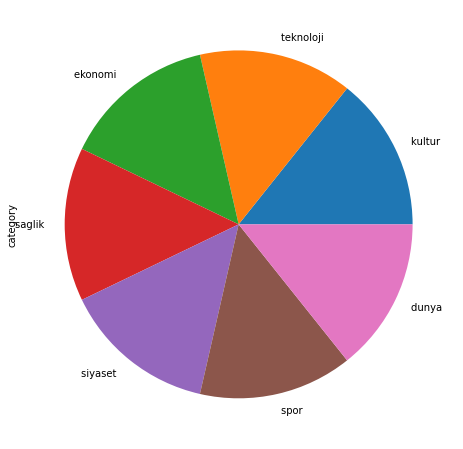

In [ ]:
data.category.value_counts().plot(kind='pie', figsize=(8,8))

In [ ]:
SIZE= data.shape[0]

train_texts= list(data.text[:SIZE//2])
val_texts=   list(data.text[SIZE//2:(3*SIZE)//4 ])
test_texts=  list(data.text[(3*SIZE)//4:])

train_labels= list(data.labels[:SIZE//2])
val_labels=   list(data.labels[SIZE//2:(3*SIZE)//4])
test_labels=  list(data.labels[(3*SIZE)//4:])

In [ ]:
len(train_texts), len(val_texts), len(test_texts)

(2450, 1225, 1225)

## Models

### mBERT

In [ ]:
from transformers import BertForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

## Trainer Class

In [ ]:
from transformers import TrainingArguments, Trainer

from sklearn.metrics import accuracy_score, precision_recall_fscore_support 
def compute_metrics(pred): 
    labels = pred.label_ids 
    preds = pred.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    } 

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=12,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

Using amp fp16 backend


In [ ]:
trainer.train()

***** Running training *****
  Num examples = 2450
  Num Epochs = 3
  Instantaneous batch size per device = 12
  Total train batch size (w. parallel, distributed & accumulation) = 12
  Gradient Accumulation steps = 1
  Total optimization steps = 615


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.874900,1.544879,0.561633,0.541990,0.760390,0.552179
100,0.960200,0.735363,0.793469,0.778694,0.830792,0.791582
150,0.694200,0.568241,0.850612,0.847669,0.858038,0.850384
200,0.571300,0.478207,0.865306,0.863887,0.868881,0.864269
250,0.486600,0.542444,0.851429,0.849249,0.861186,0.849268
300,0.324700,0.397067,0.903673,0.902958,0.904263,0.903828
350,0.354000,0.502948,0.878367,0.872766,0.882349,0.877006
400,0.387200,0.372631,0.901224,0.899263,0.899331,0.900760
450,0.212500,0.423255,0.906122,0.905321,0.905622,0.905585
500,0.259900,0.412832,0.900408,0.899868,0.900739,0.900677


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
Saving model checkpoint to ./TTC4900Model/checkpoint-500
Configuration saved in ./TTC4900Model/checkpoint-500/config.json
Model weights saved in ./TTC4900Model/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *

TrainOutput(global_step=615, training_loss=0.5331153047763235, metrics={'train_runtime': 4318.9001, 'train_samples_per_second': 1.702, 'train_steps_per_second': 0.142, 'total_flos': 1933953073920000.0, 'train_loss': 0.5331153047763235, 'epoch': 3.0})

In [ ]:
# mBERT
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

***** Running Evaluation *****
  Num examples = 2450
  Batch size = 32


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.159791,0.961224,0.961242,0.962245,0.961113
val,0.412832,0.900408,0.899868,0.900739,0.900677
test,0.413585,0.895510,0.894923,0.896563,0.895162


### XLM-R

In [ ]:
from transformers import AutoTokenizer, XLMRobertaForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base",num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer

from sklearn.metrics import accuracy_score, precision_recall_fscore_support 
def compute_metrics(pred): 
    labels = pred.label_ids 
    preds = pred.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    } 

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900ModelX', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

Using amp fp16 backend


In [ ]:
trainer.train()

***** Running training *****
  Num examples = 2450
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 921


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.880800,1.592937,0.679184,0.643101,0.652674,0.680824
100,1.111500,0.660167,0.786122,0.774655,0.801123,0.787397
150,0.916100,0.774945,0.754286,0.736967,0.809001,0.755366
200,0.789500,0.558919,0.839184,0.838625,0.850962,0.839131
250,0.739300,0.683947,0.831837,0.830387,0.842541,0.834531
300,0.632500,0.440114,0.886531,0.885317,0.886560,0.886374
350,0.510000,0.591015,0.850612,0.848534,0.861470,0.849613
400,0.535500,0.432812,0.880816,0.879499,0.883770,0.882072
450,0.300700,0.480275,0.894694,0.894113,0.894875,0.894545
500,0.374100,0.603126,0.874286,0.875424,0.891900,0.874325


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 12

TrainOutput(global_step=921, training_loss=0.5466094457106533, metrics={'train_runtime': 5348.694, 'train_samples_per_second': 1.374, 'train_steps_per_second': 0.172, 'total_flos': 1933953073920000.0, 'train_loss': 0.5466094457106533, 'epoch': 3.0})

In [ ]:
# XLM-R
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

***** Running Evaluation *****
  Num examples = 2450
  Batch size = 32


***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32
***** Running Evaluation *****
  Num examples = 1225
  Batch size = 32


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.371767,0.909796,0.908751,0.918613,0.908294
val,0.603126,0.874286,0.875424,0.891900,0.874325
test,0.571486,0.869388,0.869880,0.881309,0.871448


Conclusion: Fine-tuned XLM model did give results comparable to the monolingual models.